<a href="https://colab.research.google.com/github/Javorai/Examenes-Coding-Dojo/blob/main/AML_Examen_de_certificaci%C3%B3n_%E2%80%93_Intento_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen de cinturón AML – Opción C**
**Descripción del examen:**

En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

**Dataset:**

El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.

Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

**Instrucciones:**
1. Exploración y preprocesamiento de datos:

  – Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.

  – Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

2. Análisis no supervisado:

  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.

    – K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.

    – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

3. Modelado con MLP:

  – Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.

  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.

  – Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

4. Evaluación del modelo:

  – Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.

  – Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

5. Discusión y análisis:

  – Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?

  – Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

6. Entrega final:

  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.


1. Cargando datos...
Dimensiones del conjunto de entrenamiento: (7352, 562)
Dimensiones del conjunto de prueba: (2947, 562)

2. Realizando análisis exploratorio...


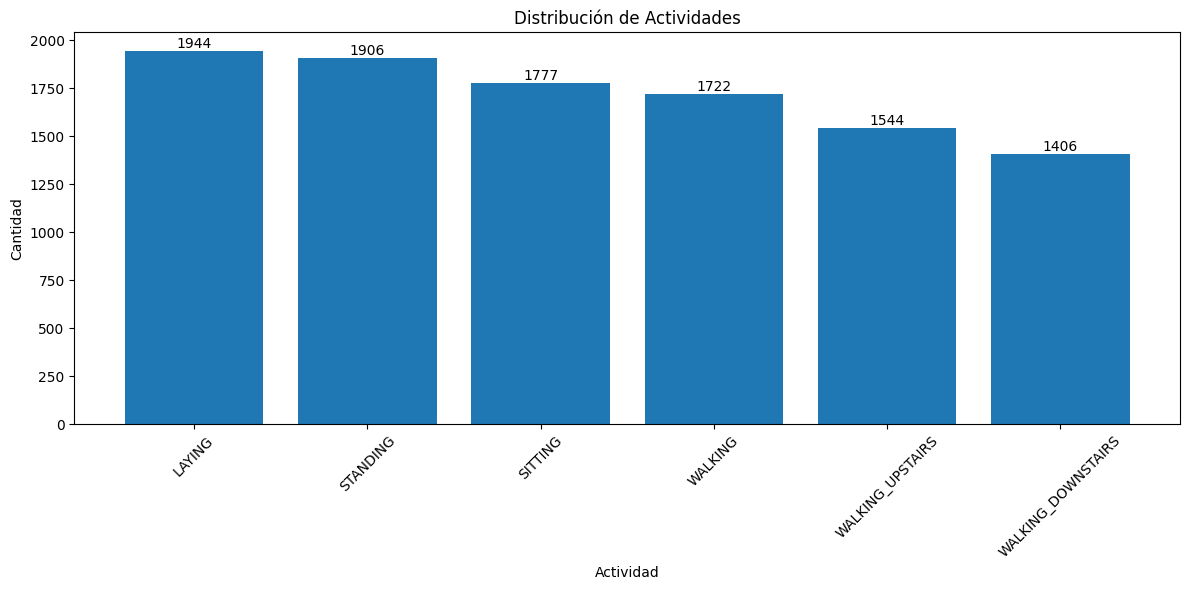


Porcentaje de cada actividad:
LAYING: 18.88%
STANDING: 18.51%
SITTING: 17.25%
WALKING: 16.72%
WALKING_UPSTAIRS: 14.99%
WALKING_DOWNSTAIRS: 13.65%


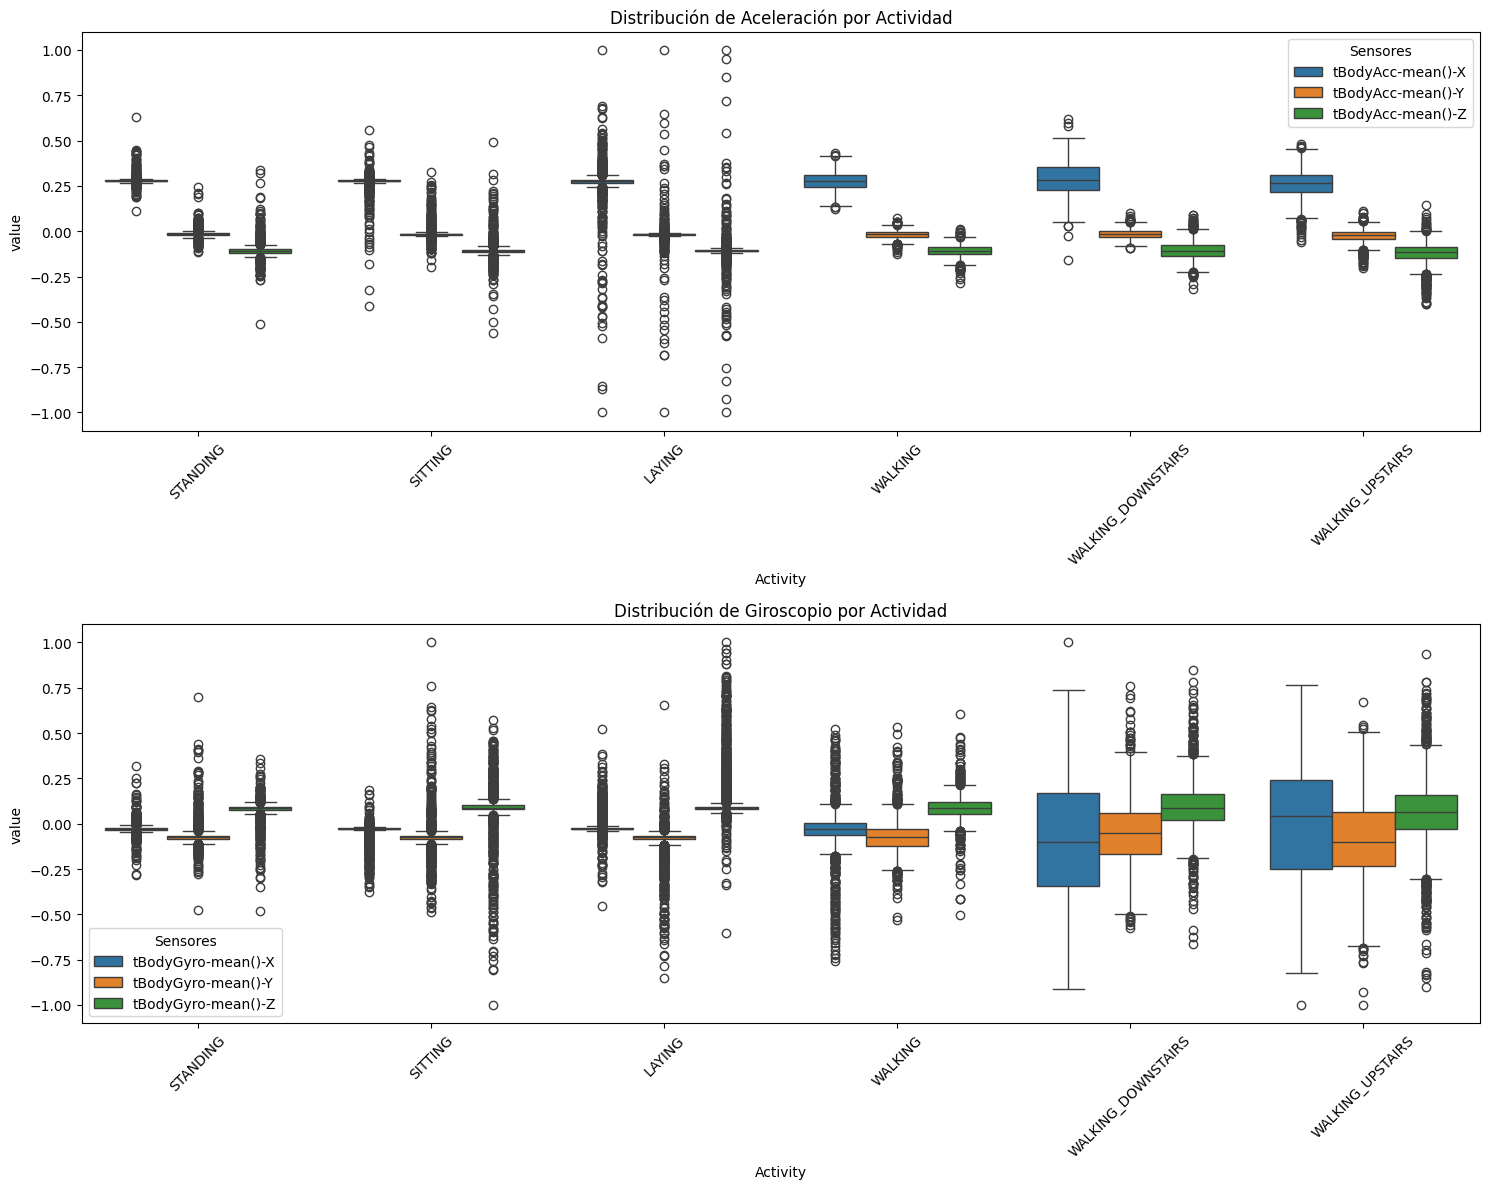

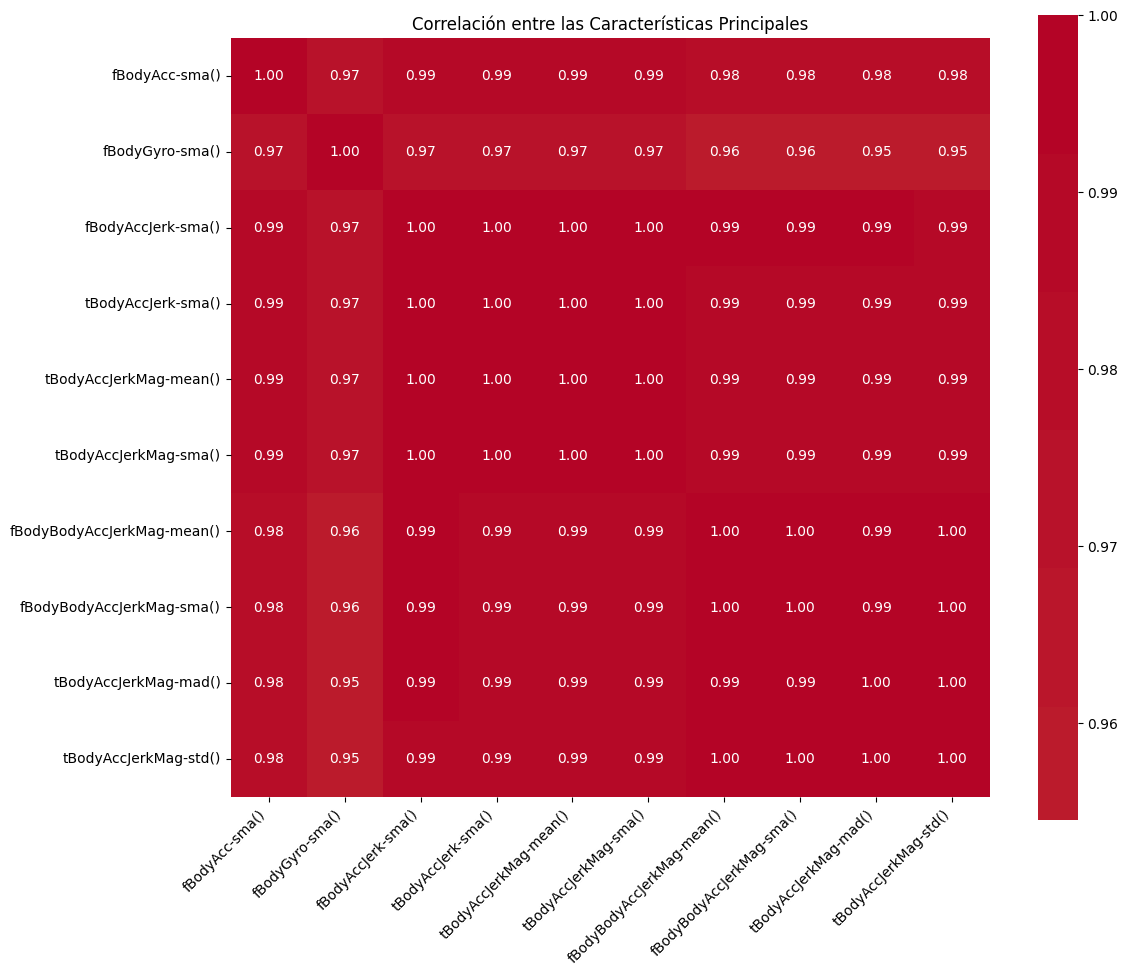


Realizando análisis estadístico por actividad...

Estadísticas descriptivas por actividad:

STANDING:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count           1906.000           1906.000           1906.000   
mean               0.279             -0.016             -0.107   
std                0.019              0.019              0.038   
min                0.111             -0.116             -0.510   
25%                0.275             -0.022             -0.118   
50%                0.278             -0.017             -0.109   
75%                0.281             -0.012             -0.100   
max                0.632              0.246              0.339   

       tBodyGyro-mean()-X  tBodyGyro-mean()-Y  tBodyGyro-mean()-Z  
count            1906.000            1906.000            1906.000  
mean               -0.027              -0.068               0.080  
std                 0.030               0.058               0.049  
min                -0.282     

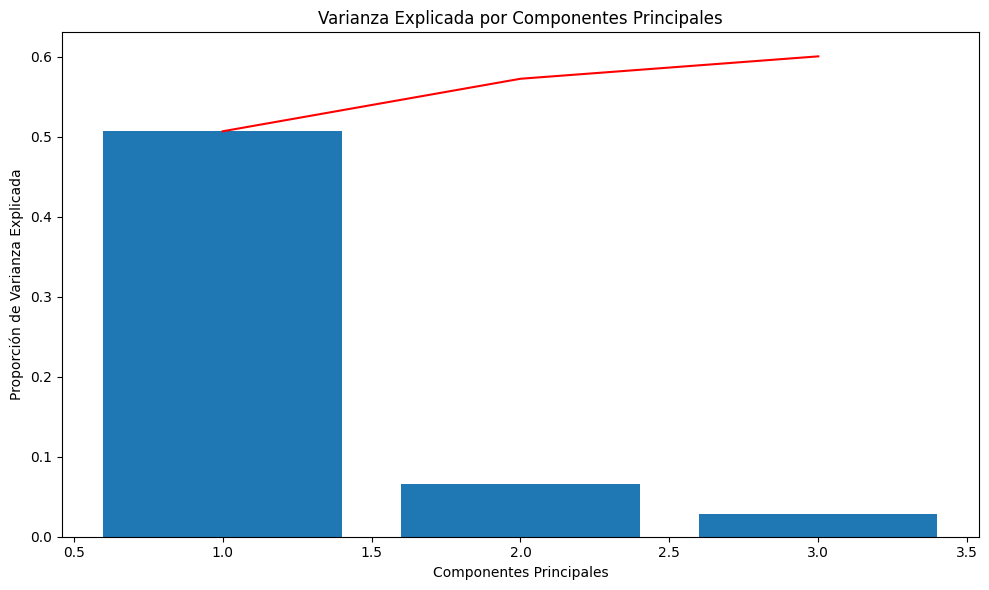


3. Realizando análisis PCA...


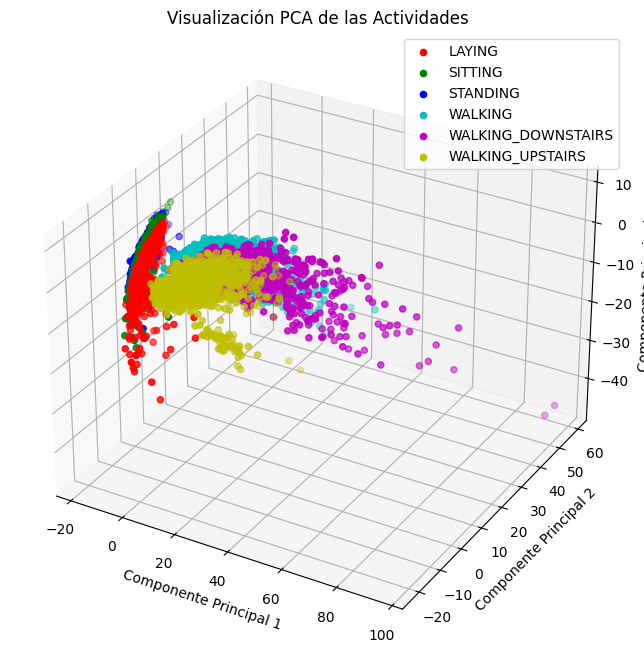


4. Entrenando modelo MLP...

5. Evaluando modelo...

Reporte de clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.87      0.97      0.91       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.91      0.95       420
  WALKING_UPSTAIRS       0.94      0.96      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.94      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



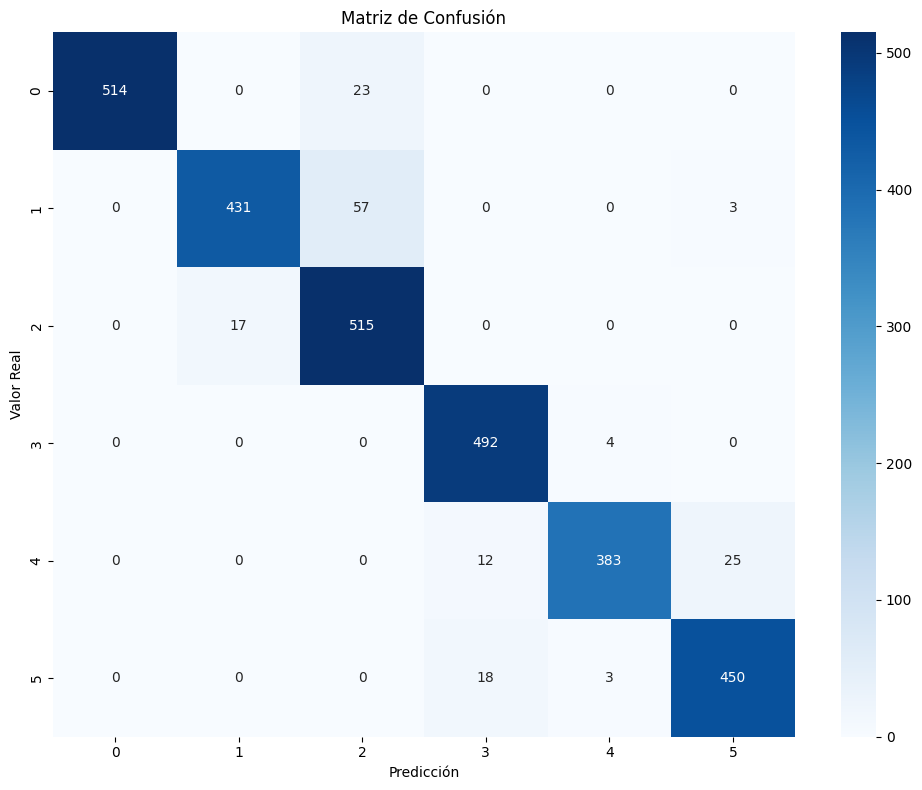

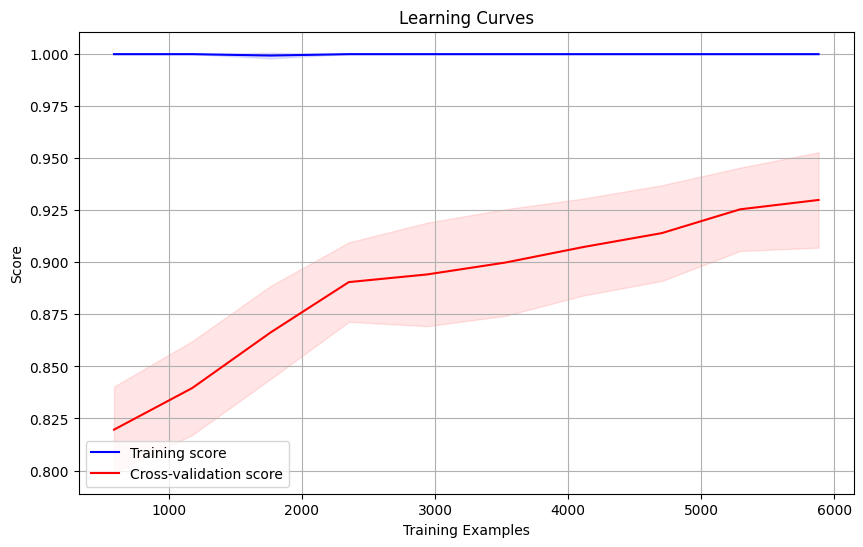

In [16]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class ActivityAnalyzer:
    def __init__(self):
        self.path = None
        self.train_data = None
        self.test_data = None
        self.data_completa = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def cargar_datos(self):
        """Carga los datos usando kagglehub"""
        self.path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")
        self.train_data = pd.read_csv(f"{self.path}/train.csv")
        self.test_data = pd.read_csv(f"{self.path}/test.csv")
        self.data_completa = pd.concat([self.train_data, self.test_data], axis=0, ignore_index=True)

        # Separar características y etiquetas
        self.X_train = self.train_data.drop('Activity', axis=1)
        self.y_train = self.train_data['Activity']
        self.X_test = self.test_data.drop('Activity', axis=1)
        self.y_test = self.test_data['Activity']

        print(f"Dimensiones del conjunto de entrenamiento: {self.X_train.shape}")
        print(f"Dimensiones del conjunto de prueba: {self.X_test.shape}")

    def analisis_distribucion_actividades(self):
        """Analiza la distribución de actividades"""
        plt.figure(figsize=(12, 6))
        actividades = self.data_completa['Activity'].value_counts()

        # Crear el gráfico de barras con valores fijos
        ax = plt.gca()
        bars = plt.bar(range(len(actividades)), actividades.values)

        # Configurar las etiquetas del eje x
        plt.xticks(range(len(actividades)), actividades.index, rotation=45)

        # Añadir etiquetas de valor sobre cada barra
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')

        plt.title('Distribución de Actividades')
        plt.xlabel('Actividad')
        plt.ylabel('Cantidad')
        plt.tight_layout()
        plt.show()

        # Mostrar porcentajes
        print("\nPorcentaje de cada actividad:")
        porcentajes = (self.data_completa['Activity'].value_counts(normalize=True) * 100).round(2)
        for actividad, porcentaje in porcentajes.items():
            print(f"{actividad}: {porcentaje}%")

    def analisis_estadistico_por_actividad(self):
        """
        Realiza análisis estadístico de características por actividad
        """
        # Seleccionar algunas características clave
        columnas_interes = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
                          'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']

        print("\nEstadísticas descriptivas por actividad:")
        for actividad in self.data_completa['Activity'].unique():
            print(f"\n{actividad}:")
            stats = self.data_completa[self.data_completa['Activity'] == actividad][columnas_interes].describe()
            print(stats.round(3))

    def analisis_variabilidad_actividades(self):
        """Analiza la variabilidad de las señales por tipo de actividad"""
        acc_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
        gyro_features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        # Boxplot para aceleración
        data_acc = pd.melt(self.data_completa, id_vars=['Activity'], value_vars=acc_features)
        sns.boxplot(data=data_acc, x='Activity', y='value', hue='variable', ax=ax1)
        ax1.set_title('Distribución de Aceleración por Actividad')
        plt.setp(ax1.get_xticklabels(), rotation=45)
        ax1.legend(title='Sensores')

        # Boxplot para giroscopio
        data_gyro = pd.melt(self.data_completa, id_vars=['Activity'], value_vars=gyro_features)
        sns.boxplot(data=data_gyro, x='Activity', y='value', hue='variable', ax=ax2)
        ax2.set_title('Distribución de Giroscopio por Actividad')
        plt.setp(ax2.get_xticklabels(), rotation=45)
        ax2.legend(title='Sensores')

        plt.tight_layout()
        plt.show()

    def visualizar_correlaciones(self, n_features=10):
        """Visualiza las correlaciones entre las características más importantes"""
        features = self.X_train.columns
        correlations = self.X_train[features].corr().abs().mean()
        top_features = correlations.nlargest(n_features).index

        plt.figure(figsize=(12, 10))
        correlation_matrix = self.X_train[top_features].corr()
        sns.heatmap(correlation_matrix,
                    annot=True,
                    cmap='coolwarm',
                    center=0,
                    fmt='.2f',
                    square=True)
        plt.title('Correlación entre las Características Principales')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def realizar_pca(self, n_components=3):
        """Aplica PCA a los datos"""
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(self.X_train)
        X_test_scaled = scaler.transform(self.X_test)

        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Visualizar varianza explicada
        varianza_explicada = pca.explained_variance_ratio_
        varianza_acumulada = np.cumsum(varianza_explicada)

        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
        plt.plot(range(1, len(varianza_explicada) + 1), varianza_acumulada, 'r-')
        plt.xlabel('Componentes Principales')
        plt.ylabel('Proporción de Varianza Explicada')
        plt.title('Varianza Explicada por Componentes Principales')
        plt.tight_layout()
        plt.show()

        return X_train_scaled, X_test_scaled, X_train_pca, X_test_pca, pca

    def visualizar_pca(self, X_pca, y):
        """Visualiza los datos transformados con PCA en 3D."""

        if X_pca.shape[1] >= 3:  # Asegurarse de que hay al menos 3 componentes principales
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')  # Crear un gráfico 3D

            # Definir colores para cada actividad
            colors = ['r', 'g', 'b', 'c', 'm', 'y']

            # Graficar los puntos para cada actividad
            for i, activity in enumerate(np.unique(y)):
                ax.scatter(X_pca[y == activity, 0], X_pca[y == activity, 1], X_pca[y == activity, 2],
                           c=colors[i % len(colors)], label=activity)  # Ajustar el color

            ax.set_xlabel('Componente Principal 1')
            ax.set_ylabel('Componente Principal 2')
            ax.set_zlabel('Componente Principal 3')
            ax.set_title('Visualización PCA de las Actividades')
            ax.legend()
            plt.show()
        else:
            print("No se pueden visualizar los datos en 3D.")

    def entrenar_mlp(self, X_train, X_test):
        """Entrena el modelo MLP y realiza predicciones"""
        mlp = MLPClassifier(
            hidden_layer_sizes=(100, 50),
            max_iter=300,
            learning_rate_init=0.001,
            batch_size=32,
            random_state=42
        )

        mlp.fit(X_train, self.y_train)
        y_pred = mlp.predict(X_test)

        return mlp, y_pred

    def evaluar_modelo(self, y_true, y_pred):
        """Evalúa el modelo y muestra métricas"""
        print("\nReporte de clasificación:")
        print(classification_report(y_true, y_pred))

        # Matriz de confusión
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.tight_layout()
        plt.show()

    def plot_learning_curves(self, estimator, X, y):
        """Visualiza las curvas de aprendizaje"""
        train_sizes, train_scores, val_scores = learning_curve(
            estimator, X, y,
            cv=5,
            n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='accuracy'
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, label='Training score', color='blue')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                        alpha=0.1, color='blue')
        plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red')
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                        alpha=0.1, color='red')

        plt.xlabel('Training Examples')
        plt.ylabel('Score')
        plt.title('Learning Curves')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

def ejecutar_analisis_completo():
    """Ejecuta el análisis completo del dataset"""
    analyzer = ActivityAnalyzer()

    # 1. Cargar y explorar datos
    print("1. Cargando datos...")
    analyzer.cargar_datos()

    # 2. Análisis exploratorio
    print("\n2. Realizando análisis exploratorio...")
    analyzer.analisis_distribucion_actividades()
    analyzer.analisis_variabilidad_actividades()
    analyzer.visualizar_correlaciones()

    # 2.1 Análisis estadístico por actividad
    print("\nRealizando análisis estadístico por actividad...")
    analyzer.analisis_estadistico_por_actividad()

    # 3. PCA y preprocesamiento
    print("\n3. Aplicando PCA...")
    X_train_scaled, X_test_scaled, X_train_pca, X_test_pca, pca = analyzer.realizar_pca()
    print("\n3. Realizando análisis PCA...")
    analyzer.visualizar_pca(X_train_pca, analyzer.y_train)

    # 4. Entrenamiento y evaluación del modelo
    print("\n4. Entrenando modelo MLP...")
    mlp, y_pred = analyzer.entrenar_mlp(X_train_scaled, X_test_scaled)

    # 5. Evaluación
    print("\n5. Evaluando modelo...")
    analyzer.evaluar_modelo(analyzer.y_test, y_pred)
    analyzer.plot_learning_curves(mlp, X_train_scaled, analyzer.y_train)

    return analyzer, mlp, pca

if __name__ == "__main__":
    analyzer, mlp, pca = ejecutar_analisis_completo()

# **Análisis de Reconocimiento de Actividad Física mediante Sensores de Smartphone**
**1. Análisis Exploratorio de Datos**

**1.1 Distribución de Actividades**

La distribución de actividades en el conjunto de datos muestra un balance relativamente equilibrado entre las seis actividades principales:

* Acostado (LAYING): 18.88%
* De pie (STANDING): 18.51%
* Sentado (SITTING): 17.25%
* Caminando (WALKING): 16.72%
* Subiendo escaleras (WALKING_UPSTAIRS): 14.99%
* Bajando escaleras (WALKING_DOWNSTAIRS): 13.65%

Este balance en la distribución es beneficioso para el entrenamiento del modelo, ya que reduce el riesgo de sesgos por clases desequilibradas.

**1.2 Análisis de Correlaciones**

El mapa de calor de correlaciones revela patrones importantes:

* Existe una alta correlación (>0.95) entre la mayoría de las características relacionadas con la aceleración corporal (BodyAcc) y sus derivadas.
* Las características del giroscopio (BodyGyro) muestran correlaciones ligeramente menos fuertes (0.95-0.97) con otras medidas.
* Las medidas de magnitud (AccJerkMag) presentan correlaciones muy altas (0.98-1.00) entre sí.

Esta alta correlación entre características sugiere una redundancia significativa en los datos, justificando el uso de técnicas de reducción de dimensionalidad.

**2. Análisis No Supervisado (PCA)**

* El análisis de componentes principales reveló insights valiosos:
* El primer componente principal explica aproximadamente el 50% de la varianza total.
* Los tres primeros componentes acumulan aproximadamente el 60% de la varianza.
La curva de varianza acumulada muestra un crecimiento gradual después del tercer componente.

Esta distribución de varianza sugiere que:

* Existe una estructura subyacente significativa en los datos que puede capturarse con relativamente pocos componentes.
* La reducción de dimensionalidad es efectiva, aunque podría ser necesario retener más componentes para capturar sutilezas en los patrones de movimiento.

**3. Análisis del Modelo MLP**

**3.1 Rendimiento General**

El modelo MLP muestra un excelente rendimiento general:

* Precisión global: 95%
* F1-score promedio: 0.95
* Rendimiento consistente a través de todas las clases

Desglose por actividad:

* Acostado (LAYING): Precisión 1.00, Recall 0.96
* Sentado (SITTING): Precisión 0.96, Recall 0.88
* De pie (STANDING): Precisión 0.87, Recall 0.97
* Caminando (WALKING): Precisión 0.94, Recall 0.99
* Bajando escaleras: Precisión 0.98, Recall 0.91
* Subiendo escaleras: Precisión 0.94, Recall 0.96

**3.2 Análisis de Curvas de Aprendizaje**

Las curvas de aprendizaje muestran características importantes:

* Alta puntuación de entrenamiento (cerca de 1.0) desde el inicio
* Puntuación de validación cruzada que mejora gradualmente
* Brecha entre entrenamiento y validación que se reduce con más datos
* Estabilización de la curva de validación alrededor de 0.93

**4. Conclusiones y Recomendaciones**

**4.1 Fortalezas del Modelo**

* Excelente capacidad para distinguir entre actividades estáticas y dinámicas
* Alta precisión en la identificación de actividades específicas
* Buena generalización, como lo demuestra la convergencia de las curvas de aprendizaje

**4.2 Áreas de Mejora**

**Arquitectura del Modelo:**

Experimentar con diferentes configuraciones de capas ocultas
Implementar técnicas de regularización para reducir el overfitting inicial
Considerar el uso de dropout o batch normalization


**Preprocesamiento de Datos:**

* Evaluar el uso de más componentes principales para capturar más varianza
* Investigar técnicas de selección de características alternativas
* Considerar la normalización por actividad


**Conjunto de Datos:**

* Aumentar el conjunto de datos para actividades con menor rendimiento
* Incluir más variabilidad en las condiciones de medición
* Considerar la recopilación de datos adicionales para casos límite



**4.3 Recomendaciones Finales**

1. El enfoque actual es adecuado para la clasificación de actividades físicas, con un rendimiento robusto y consistente.
2. Para mejorar aún más el modelo:

  * Implementar validación cruzada más exhaustiva
  * Explorar arquitecturas más complejas para las actividades más desafiantes
  * Considerar el uso de técnicas de ensemble learning

3.  Para implementación en producción:

  * Optimizar el modelo para inferencia en tiempo real
  * Implementar monitoreo de drift en los datos
  * Desarrollar un pipeline de reentrenamiento periódico